In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Defining method to unload images
def unpickle_batch(file):
    import pickle
    with open(file, 'rb') as fo:
        bdict = pickle.load(fo, encoding='latin-1')
        nImgs = len(bdict['data'])
        imgs = bdict['data'].reshape(nImgs,3,32,32).transpose(0, 2, 3, 1)
        labels = bdict['labels']
    return (imgs,labels)

In [3]:
#loading all batches
images = []
labels = []
no_of_batches = 5
path = '/home/abhi/Image Datasets/cifar-10-batches-py/data_batch_'
batch_id = 1
for batch_id in range(batch_id,no_of_batches+1):
    batch_images,batch_labels = unpickle_batch(path+str(batch_id))
    for each in batch_images:
        images.append(each)
    for each in batch_labels:
        labels.append(each)

In [4]:
#len(images)#.shape
len(labels)

50000

In [5]:
images[0].shape

(32, 32, 3)

In [6]:
len(images)

50000

In [7]:
def unpickle_metadata(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin-1')
    return dict

In [8]:
label_names_dict = unpickle_metadata('/home/abhi/Image Datasets/cifar-10-batches-py/batches.meta')

In [9]:
label_names=label_names_dict['label_names']

In [10]:
label_names[labels[4]]

'automobile'

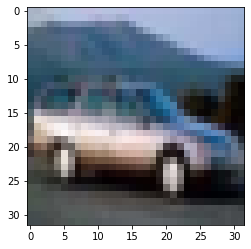

In [11]:
plt.imshow(images[4],cmap = 'gray')

In [12]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
images_per_batch = label_names_dict['num_cases_per_batch']

In [15]:
images_per_batch

10000

In [16]:
label_names_dict

{'num_cases_per_batch': 10000,
 'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_vis': 3072}

In [17]:
def gray(img):
    grayImage = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return grayImage

In [18]:
# defining method to get descriptors using SIFT
sift = cv2.xfeatures2d.SIFT_create()
def getFeatures(img):
    kp,desc = sift.detectAndCompute(img,mask=None)
    return kp,desc

In [19]:
kp,des = getFeatures(images[0])

In [76]:
# for i in range(len(images)):
#      print(images[i].shape,"  ",i)

In [22]:
type(des)

numpy.ndarray

In [23]:
# Creating descriptors for each image
kp_list = []
desc_list = []
for each in images:
    grayimage = gray(each)
    kp,desc = getFeatures(each)
    if desc is None:
        zero = np.zeros([1,128],dtype='float32')
        desc_list.append(zero)
        continue
    kp_list.append(kp)
    desc_list.append(desc)

In [26]:
len(kp_list)
len(desc_list)
desc_list[996].shape

(18, 128)

In [27]:
def restructure(des_list):
    featlist = np.array(des_list[0])
    for remaining in des_list[1:]:
        featlist = np.vstack((featlist,remaining))
    return featlist

In [28]:
X = restructure(desc_list)

In [29]:
X[129812]
X.shape

(650422, 128)

In [28]:
desc_list[9999][10]

array([  6., 109.,  58.,  15.,   9.,  14.,   0.,   0.,  90., 129.,  54.,
         1.,   0.,   1.,   0.,   1.,  47.,  35.,  16., 129.,  63.,  40.,
         2.,   1.,   0.,   0.,  32., 129.,  71.,  62.,  23.,   0.,  21.,
        17.,   2.,   1.,  12.,  99.,   9.,   8., 129.,  56.,   2.,  10.,
        11.,  12.,   4.,  32.,  43.,   9.,   5., 129., 129.,   5.,   0.,
         3.,   0.,   0.,   5.,  81., 120.,  46.,   4.,   0.,  11.,   0.,
         0.,  12.,  41.,  53.,   7.,   8., 129.,  27.,   5.,  19.,  27.,
        11.,   6.,  35.,  17.,   9.,   4.,  75., 129.,  36.,   1.,   2.,
         0.,   0.,   0.,   3.,  35.,  53.,   5.,   0.,   1.,   0.,   0.,
        12.,  16.,  16.,  65.,  26.,  23.,   1.,   0.,   1.,  27.,  11.,
        36.,  69.,   2.,   0.,   0.,   2.,  82.,  50.,   2.,   4.,   0.,
         0.,   0.,   0.,   2.,  11.,   1.,   0.], dtype=float32)

In [223]:
# #type(desc_list[5])
sum = 0
for i in range(len(desc_list)):
    sum = sum +(desc_list[i].shape[0])
    print(desc_list[i].shape,"  ",i)

(18, 128)    0
(18, 128)    1
(13, 128)    2
(11, 128)    3
(13, 128)    4
(9, 128)    5
(18, 128)    6
(11, 128)    7
(19, 128)    8
(14, 128)    9
(4, 128)    10
(18, 128)    11
(19, 128)    12
(16, 128)    13
(13, 128)    14
(7, 128)    15
(15, 128)    16
(20, 128)    17
(13, 128)    18
(13, 128)    19
(13, 128)    20
(10, 128)    21
(7, 128)    22
(15, 128)    23
(14, 128)    24
(14, 128)    25
(11, 128)    26
(12, 128)    27
(9, 128)    28
(13, 128)    29
(5, 128)    30
(23, 128)    31
(13, 128)    32
(24, 128)    33
(15, 128)    34
(12, 128)    35
(21, 128)    36
(17, 128)    37
(12, 128)    38
(11, 128)    39
(10, 128)    40
(1, 128)    41
(9, 128)    42
(21, 128)    43
(9, 128)    44
(12, 128)    45
(9, 128)    46
(4, 128)    47
(14, 128)    48
(16, 128)    49
(8, 128)    50
(24, 128)    51
(25, 128)    52
(13, 128)    53
(3, 128)    54
(14, 128)    55
(23, 128)    56
(13, 128)    57
(10, 128)    58
(25, 128)    59
(13, 128)    60
(19, 128)    61
(4, 128)    62
(14, 128)    63


(7, 128)    520
(14, 128)    521
(13, 128)    522
(18, 128)    523
(14, 128)    524
(18, 128)    525
(22, 128)    526
(6, 128)    527
(13, 128)    528
(14, 128)    529
(16, 128)    530
(27, 128)    531
(18, 128)    532
(9, 128)    533
(19, 128)    534
(14, 128)    535
(22, 128)    536
(13, 128)    537
(11, 128)    538
(10, 128)    539
(14, 128)    540
(11, 128)    541
(14, 128)    542
(16, 128)    543
(11, 128)    544
(11, 128)    545
(17, 128)    546
(12, 128)    547
(13, 128)    548
(18, 128)    549
(13, 128)    550
(20, 128)    551
(16, 128)    552
(16, 128)    553
(11, 128)    554
(13, 128)    555
(23, 128)    556
(1, 128)    557
(4, 128)    558
(6, 128)    559
(11, 128)    560
(18, 128)    561
(9, 128)    562
(15, 128)    563
(7, 128)    564
(10, 128)    565
(3, 128)    566
(11, 128)    567
(10, 128)    568
(9, 128)    569
(12, 128)    570
(15, 128)    571
(5, 128)    572
(14, 128)    573
(6, 128)    574
(20, 128)    575
(20, 128)    576
(10, 128)    577
(17, 128)    578
(12, 128)

(14, 128)    1075
(15, 128)    1076
(11, 128)    1077
(19, 128)    1078
(13, 128)    1079
(3, 128)    1080
(23, 128)    1081
(13, 128)    1082
(13, 128)    1083
(12, 128)    1084
(12, 128)    1085
(13, 128)    1086
(14, 128)    1087
(9, 128)    1088
(28, 128)    1089
(16, 128)    1090
(15, 128)    1091
(7, 128)    1092
(13, 128)    1093
(9, 128)    1094
(13, 128)    1095
(24, 128)    1096
(20, 128)    1097
(16, 128)    1098
(16, 128)    1099
(19, 128)    1100
(21, 128)    1101
(11, 128)    1102
(13, 128)    1103
(12, 128)    1104
(19, 128)    1105
(8, 128)    1106
(12, 128)    1107
(7, 128)    1108
(12, 128)    1109
(14, 128)    1110
(15, 128)    1111
(15, 128)    1112
(14, 128)    1113
(14, 128)    1114
(17, 128)    1115
(14, 128)    1116
(16, 128)    1117
(12, 128)    1118
(2, 128)    1119
(19, 128)    1120
(11, 128)    1121
(11, 128)    1122
(2, 128)    1123
(16, 128)    1124
(17, 128)    1125
(9, 128)    1126
(18, 128)    1127
(10, 128)    1128
(7, 128)    1129
(9, 128)    1130
(15

(13, 128)    1641
(14, 128)    1642
(16, 128)    1643
(8, 128)    1644
(7, 128)    1645
(17, 128)    1646
(18, 128)    1647
(12, 128)    1648
(17, 128)    1649
(21, 128)    1650
(12, 128)    1651
(13, 128)    1652
(15, 128)    1653
(16, 128)    1654
(15, 128)    1655
(23, 128)    1656
(6, 128)    1657
(13, 128)    1658
(9, 128)    1659
(12, 128)    1660
(16, 128)    1661
(19, 128)    1662
(8, 128)    1663
(4, 128)    1664
(7, 128)    1665
(13, 128)    1666
(14, 128)    1667
(9, 128)    1668
(7, 128)    1669
(15, 128)    1670
(16, 128)    1671
(12, 128)    1672
(12, 128)    1673
(14, 128)    1674
(14, 128)    1675
(21, 128)    1676
(4, 128)    1677
(13, 128)    1678
(16, 128)    1679
(17, 128)    1680
(15, 128)    1681
(22, 128)    1682
(15, 128)    1683
(8, 128)    1684
(12, 128)    1685
(4, 128)    1686
(12, 128)    1687
(5, 128)    1688
(17, 128)    1689
(13, 128)    1690
(23, 128)    1691
(1, 128)    1692
(17, 128)    1693
(19, 128)    1694
(11, 128)    1695
(20, 128)    1696
(13, 1

(3, 128)    2247
(17, 128)    2248
(15, 128)    2249
(17, 128)    2250
(16, 128)    2251
(5, 128)    2252
(3, 128)    2253
(4, 128)    2254
(16, 128)    2255
(18, 128)    2256
(11, 128)    2257
(15, 128)    2258
(11, 128)    2259
(12, 128)    2260
(12, 128)    2261
(6, 128)    2262
(18, 128)    2263
(6, 128)    2264
(12, 128)    2265
(8, 128)    2266
(22, 128)    2267
(14, 128)    2268
(8, 128)    2269
(9, 128)    2270
(21, 128)    2271
(13, 128)    2272
(11, 128)    2273
(18, 128)    2274
(9, 128)    2275
(17, 128)    2276
(1, 128)    2277
(8, 128)    2278
(12, 128)    2279
(16, 128)    2280
(10, 128)    2281
(12, 128)    2282
(19, 128)    2283
(12, 128)    2284
(5, 128)    2285
(22, 128)    2286
(13, 128)    2287
(21, 128)    2288
(6, 128)    2289
(10, 128)    2290
(21, 128)    2291
(22, 128)    2292
(10, 128)    2293
(23, 128)    2294
(21, 128)    2295
(13, 128)    2296
(12, 128)    2297
(8, 128)    2298
(19, 128)    2299
(15, 128)    2300
(16, 128)    2301
(15, 128)    2302
(18, 12

(2, 128)    2787
(16, 128)    2788
(8, 128)    2789
(11, 128)    2790
(17, 128)    2791
(9, 128)    2792
(14, 128)    2793
(9, 128)    2794
(16, 128)    2795
(9, 128)    2796
(6, 128)    2797
(9, 128)    2798
(8, 128)    2799
(10, 128)    2800
(10, 128)    2801
(14, 128)    2802
(20, 128)    2803
(4, 128)    2804
(11, 128)    2805
(26, 128)    2806
(15, 128)    2807
(3, 128)    2808
(10, 128)    2809
(13, 128)    2810
(15, 128)    2811
(10, 128)    2812
(15, 128)    2813
(14, 128)    2814
(5, 128)    2815
(8, 128)    2816
(3, 128)    2817
(25, 128)    2818
(11, 128)    2819
(6, 128)    2820
(23, 128)    2821
(10, 128)    2822
(15, 128)    2823
(1, 128)    2824
(15, 128)    2825
(10, 128)    2826
(14, 128)    2827
(15, 128)    2828
(12, 128)    2829
(12, 128)    2830
(13, 128)    2831
(13, 128)    2832
(11, 128)    2833
(16, 128)    2834
(10, 128)    2835
(3, 128)    2836
(13, 128)    2837
(16, 128)    2838
(14, 128)    2839
(9, 128)    2840
(14, 128)    2841
(4, 128)    2842
(11, 128) 

(14, 128)    3370
(15, 128)    3371
(9, 128)    3372
(16, 128)    3373
(11, 128)    3374
(18, 128)    3375
(9, 128)    3376
(16, 128)    3377
(15, 128)    3378
(23, 128)    3379
(10, 128)    3380
(14, 128)    3381
(7, 128)    3382
(7, 128)    3383
(9, 128)    3384
(10, 128)    3385
(20, 128)    3386
(12, 128)    3387
(20, 128)    3388
(10, 128)    3389
(11, 128)    3390
(15, 128)    3391
(14, 128)    3392
(13, 128)    3393
(19, 128)    3394
(10, 128)    3395
(11, 128)    3396
(9, 128)    3397
(17, 128)    3398
(18, 128)    3399
(19, 128)    3400
(17, 128)    3401
(10, 128)    3402
(8, 128)    3403
(13, 128)    3404
(15, 128)    3405
(14, 128)    3406
(13, 128)    3407
(8, 128)    3408
(16, 128)    3409
(11, 128)    3410
(15, 128)    3411
(15, 128)    3412
(14, 128)    3413
(13, 128)    3414
(16, 128)    3415
(12, 128)    3416
(12, 128)    3417
(1, 128)    3418
(12, 128)    3419
(12, 128)    3420
(12, 128)    3421
(15, 128)    3422
(5, 128)    3423
(10, 128)    3424
(22, 128)    3425
(1

(5, 128)    3932
(11, 128)    3933
(17, 128)    3934
(13, 128)    3935
(12, 128)    3936
(16, 128)    3937
(5, 128)    3938
(16, 128)    3939
(18, 128)    3940
(15, 128)    3941
(18, 128)    3942
(20, 128)    3943
(9, 128)    3944
(19, 128)    3945
(16, 128)    3946
(10, 128)    3947
(23, 128)    3948
(2, 128)    3949
(16, 128)    3950
(18, 128)    3951
(17, 128)    3952
(15, 128)    3953
(18, 128)    3954
(11, 128)    3955
(10, 128)    3956
(11, 128)    3957
(15, 128)    3958
(6, 128)    3959
(16, 128)    3960
(12, 128)    3961
(10, 128)    3962
(11, 128)    3963
(7, 128)    3964
(15, 128)    3965
(18, 128)    3966
(10, 128)    3967
(11, 128)    3968
(9, 128)    3969
(9, 128)    3970
(3, 128)    3971
(8, 128)    3972
(5, 128)    3973
(8, 128)    3974
(19, 128)    3975
(15, 128)    3976
(13, 128)    3977
(15, 128)    3978
(2, 128)    3979
(12, 128)    3980
(25, 128)    3981
(6, 128)    3982
(20, 128)    3983
(6, 128)    3984
(8, 128)    3985
(17, 128)    3986
(8, 128)    3987
(19, 128)

(13, 128)    4506
(13, 128)    4507
(11, 128)    4508
(3, 128)    4509
(16, 128)    4510
(5, 128)    4511
(14, 128)    4512
(15, 128)    4513
(12, 128)    4514
(21, 128)    4515
(5, 128)    4516
(12, 128)    4517
(10, 128)    4518
(17, 128)    4519
(16, 128)    4520
(10, 128)    4521
(5, 128)    4522
(8, 128)    4523
(15, 128)    4524
(9, 128)    4525
(6, 128)    4526
(8, 128)    4527
(12, 128)    4528
(22, 128)    4529
(11, 128)    4530
(15, 128)    4531
(7, 128)    4532
(12, 128)    4533
(15, 128)    4534
(21, 128)    4535
(8, 128)    4536
(13, 128)    4537
(8, 128)    4538
(12, 128)    4539
(2, 128)    4540
(9, 128)    4541
(19, 128)    4542
(11, 128)    4543
(9, 128)    4544
(6, 128)    4545
(6, 128)    4546
(14, 128)    4547
(14, 128)    4548
(11, 128)    4549
(10, 128)    4550
(11, 128)    4551
(3, 128)    4552
(10, 128)    4553
(13, 128)    4554
(12, 128)    4555
(16, 128)    4556
(15, 128)    4557
(13, 128)    4558
(17, 128)    4559
(16, 128)    4560
(17, 128)    4561
(16, 128)

(13, 128)    5054
(10, 128)    5055
(14, 128)    5056
(20, 128)    5057
(19, 128)    5058
(9, 128)    5059
(9, 128)    5060
(15, 128)    5061
(16, 128)    5062
(9, 128)    5063
(4, 128)    5064
(22, 128)    5065
(13, 128)    5066
(17, 128)    5067
(11, 128)    5068
(13, 128)    5069
(21, 128)    5070
(10, 128)    5071
(13, 128)    5072
(10, 128)    5073
(9, 128)    5074
(10, 128)    5075
(13, 128)    5076
(6, 128)    5077
(10, 128)    5078
(14, 128)    5079
(17, 128)    5080
(5, 128)    5081
(9, 128)    5082
(14, 128)    5083
(10, 128)    5084
(6, 128)    5085
(15, 128)    5086
(15, 128)    5087
(10, 128)    5088
(10, 128)    5089
(9, 128)    5090
(10, 128)    5091
(9, 128)    5092
(5, 128)    5093
(16, 128)    5094
(11, 128)    5095
(24, 128)    5096
(7, 128)    5097
(15, 128)    5098
(15, 128)    5099
(13, 128)    5100
(18, 128)    5101
(17, 128)    5102
(15, 128)    5103
(13, 128)    5104
(12, 128)    5105
(7, 128)    5106
(11, 128)    5107
(11, 128)    5108
(17, 128)    5109
(19, 1

(2, 128)    5636
(19, 128)    5637
(10, 128)    5638
(5, 128)    5639
(10, 128)    5640
(17, 128)    5641
(7, 128)    5642
(21, 128)    5643
(10, 128)    5644
(11, 128)    5645
(13, 128)    5646
(7, 128)    5647
(17, 128)    5648
(10, 128)    5649
(6, 128)    5650
(22, 128)    5651
(18, 128)    5652
(14, 128)    5653
(15, 128)    5654
(16, 128)    5655
(9, 128)    5656
(4, 128)    5657
(10, 128)    5658
(6, 128)    5659
(11, 128)    5660
(11, 128)    5661
(18, 128)    5662
(17, 128)    5663
(16, 128)    5664
(4, 128)    5665
(16, 128)    5666
(13, 128)    5667
(23, 128)    5668
(15, 128)    5669
(10, 128)    5670
(16, 128)    5671
(8, 128)    5672
(10, 128)    5673
(15, 128)    5674
(12, 128)    5675
(8, 128)    5676
(12, 128)    5677
(16, 128)    5678
(13, 128)    5679
(9, 128)    5680
(24, 128)    5681
(8, 128)    5682
(15, 128)    5683
(14, 128)    5684
(7, 128)    5685
(3, 128)    5686
(12, 128)    5687
(10, 128)    5688
(14, 128)    5689
(11, 128)    5690
(16, 128)    5691
(12, 12

(21, 128)    6158
(11, 128)    6159
(7, 128)    6160
(16, 128)    6161
(11, 128)    6162
(8, 128)    6163
(13, 128)    6164
(8, 128)    6165
(17, 128)    6166
(18, 128)    6167
(12, 128)    6168
(15, 128)    6169
(6, 128)    6170
(16, 128)    6171
(11, 128)    6172
(6, 128)    6173
(18, 128)    6174
(15, 128)    6175
(5, 128)    6176
(5, 128)    6177
(18, 128)    6178
(11, 128)    6179
(10, 128)    6180
(12, 128)    6181
(6, 128)    6182
(18, 128)    6183
(13, 128)    6184
(7, 128)    6185
(9, 128)    6186
(13, 128)    6187
(5, 128)    6188
(12, 128)    6189
(15, 128)    6190
(14, 128)    6191
(9, 128)    6192
(14, 128)    6193
(15, 128)    6194
(14, 128)    6195
(9, 128)    6196
(19, 128)    6197
(15, 128)    6198
(14, 128)    6199
(15, 128)    6200
(17, 128)    6201
(14, 128)    6202
(15, 128)    6203
(8, 128)    6204
(13, 128)    6205
(14, 128)    6206
(16, 128)    6207
(15, 128)    6208
(19, 128)    6209
(12, 128)    6210
(14, 128)    6211
(16, 128)    6212
(10, 128)    6213
(21, 1

(14, 128)    6672
(11, 128)    6673
(10, 128)    6674
(20, 128)    6675
(16, 128)    6676
(11, 128)    6677
(15, 128)    6678
(3, 128)    6679
(13, 128)    6680
(11, 128)    6681
(18, 128)    6682
(24, 128)    6683
(30, 128)    6684
(11, 128)    6685
(16, 128)    6686
(8, 128)    6687
(8, 128)    6688
(23, 128)    6689
(13, 128)    6690
(16, 128)    6691
(17, 128)    6692
(14, 128)    6693
(1, 128)    6694
(15, 128)    6695
(20, 128)    6696
(12, 128)    6697
(17, 128)    6698
(12, 128)    6699
(11, 128)    6700
(12, 128)    6701
(8, 128)    6702
(8, 128)    6703
(14, 128)    6704
(10, 128)    6705
(12, 128)    6706
(17, 128)    6707
(19, 128)    6708
(23, 128)    6709
(9, 128)    6710
(18, 128)    6711
(11, 128)    6712
(14, 128)    6713
(10, 128)    6714
(14, 128)    6715
(16, 128)    6716
(9, 128)    6717
(11, 128)    6718
(12, 128)    6719
(11, 128)    6720
(6, 128)    6721
(17, 128)    6722
(14, 128)    6723
(13, 128)    6724
(22, 128)    6725
(15, 128)    6726
(18, 128)    6727
(

(21, 128)    7230
(11, 128)    7231
(17, 128)    7232
(14, 128)    7233
(11, 128)    7234
(15, 128)    7235
(13, 128)    7236
(3, 128)    7237
(16, 128)    7238
(21, 128)    7239
(10, 128)    7240
(20, 128)    7241
(13, 128)    7242
(12, 128)    7243
(6, 128)    7244
(19, 128)    7245
(12, 128)    7246
(7, 128)    7247
(12, 128)    7248
(15, 128)    7249
(12, 128)    7250
(6, 128)    7251
(12, 128)    7252
(13, 128)    7253
(10, 128)    7254
(19, 128)    7255
(8, 128)    7256
(22, 128)    7257
(13, 128)    7258
(11, 128)    7259
(20, 128)    7260
(25, 128)    7261
(19, 128)    7262
(11, 128)    7263
(11, 128)    7264
(13, 128)    7265
(6, 128)    7266
(11, 128)    7267
(23, 128)    7268
(9, 128)    7269
(12, 128)    7270
(17, 128)    7271
(13, 128)    7272
(21, 128)    7273
(7, 128)    7274
(7, 128)    7275
(23, 128)    7276
(10, 128)    7277
(26, 128)    7278
(11, 128)    7279
(19, 128)    7280
(8, 128)    7281
(9, 128)    7282
(5, 128)    7283
(15, 128)    7284
(10, 128)    7285
(16,

(11, 128)    7763
(22, 128)    7764
(11, 128)    7765
(11, 128)    7766
(9, 128)    7767
(7, 128)    7768
(14, 128)    7769
(15, 128)    7770
(11, 128)    7771
(20, 128)    7772
(10, 128)    7773
(15, 128)    7774
(10, 128)    7775
(22, 128)    7776
(6, 128)    7777
(17, 128)    7778
(11, 128)    7779
(16, 128)    7780
(8, 128)    7781
(11, 128)    7782
(16, 128)    7783
(8, 128)    7784
(15, 128)    7785
(11, 128)    7786
(14, 128)    7787
(23, 128)    7788
(19, 128)    7789
(5, 128)    7790
(7, 128)    7791
(11, 128)    7792
(9, 128)    7793
(9, 128)    7794
(8, 128)    7795
(17, 128)    7796
(6, 128)    7797
(16, 128)    7798
(21, 128)    7799
(23, 128)    7800
(8, 128)    7801
(12, 128)    7802
(6, 128)    7803
(9, 128)    7804
(8, 128)    7805
(9, 128)    7806
(13, 128)    7807
(6, 128)    7808
(17, 128)    7809
(6, 128)    7810
(3, 128)    7811
(10, 128)    7812
(13, 128)    7813
(12, 128)    7814
(21, 128)    7815
(17, 128)    7816
(14, 128)    7817
(16, 128)    7818
(21, 128)  

(22, 128)    8303
(8, 128)    8304
(11, 128)    8305
(23, 128)    8306
(11, 128)    8307
(14, 128)    8308
(4, 128)    8309
(9, 128)    8310
(15, 128)    8311
(14, 128)    8312
(25, 128)    8313
(11, 128)    8314
(18, 128)    8315
(15, 128)    8316
(12, 128)    8317
(8, 128)    8318
(22, 128)    8319
(13, 128)    8320
(11, 128)    8321
(18, 128)    8322
(17, 128)    8323
(4, 128)    8324
(21, 128)    8325
(26, 128)    8326
(21, 128)    8327
(23, 128)    8328
(13, 128)    8329
(16, 128)    8330
(10, 128)    8331
(9, 128)    8332
(11, 128)    8333
(18, 128)    8334
(7, 128)    8335
(15, 128)    8336
(8, 128)    8337
(11, 128)    8338
(13, 128)    8339
(9, 128)    8340
(11, 128)    8341
(8, 128)    8342
(20, 128)    8343
(8, 128)    8344
(18, 128)    8345
(11, 128)    8346
(9, 128)    8347
(6, 128)    8348
(10, 128)    8349
(17, 128)    8350
(17, 128)    8351
(23, 128)    8352
(14, 128)    8353
(18, 128)    8354
(3, 128)    8355
(5, 128)    8356
(17, 128)    8357
(9, 128)    8358
(21, 128

(12, 128)    8863
(24, 128)    8864
(10, 128)    8865
(18, 128)    8866
(12, 128)    8867
(11, 128)    8868
(12, 128)    8869
(10, 128)    8870
(11, 128)    8871
(9, 128)    8872
(13, 128)    8873
(8, 128)    8874
(11, 128)    8875
(10, 128)    8876
(15, 128)    8877
(14, 128)    8878
(8, 128)    8879
(11, 128)    8880
(9, 128)    8881
(9, 128)    8882
(9, 128)    8883
(15, 128)    8884
(17, 128)    8885
(14, 128)    8886
(19, 128)    8887
(15, 128)    8888
(2, 128)    8889
(3, 128)    8890
(22, 128)    8891
(10, 128)    8892
(9, 128)    8893
(13, 128)    8894
(15, 128)    8895
(12, 128)    8896
(14, 128)    8897
(6, 128)    8898
(8, 128)    8899
(19, 128)    8900
(19, 128)    8901
(16, 128)    8902
(10, 128)    8903
(11, 128)    8904
(15, 128)    8905
(7, 128)    8906
(16, 128)    8907
(14, 128)    8908
(15, 128)    8909
(22, 128)    8910
(15, 128)    8911
(3, 128)    8912
(11, 128)    8913
(16, 128)    8914
(12, 128)    8915
(21, 128)    8916
(9, 128)    8917
(13, 128)    8918
(9, 12

(33, 128)    9364
(16, 128)    9365
(7, 128)    9366
(15, 128)    9367
(13, 128)    9368
(14, 128)    9369
(21, 128)    9370
(16, 128)    9371
(11, 128)    9372
(6, 128)    9373
(14, 128)    9374
(10, 128)    9375
(15, 128)    9376
(22, 128)    9377
(11, 128)    9378
(3, 128)    9379
(13, 128)    9380
(11, 128)    9381
(11, 128)    9382
(16, 128)    9383
(11, 128)    9384
(12, 128)    9385
(3, 128)    9386
(12, 128)    9387
(17, 128)    9388
(14, 128)    9389
(9, 128)    9390
(14, 128)    9391
(13, 128)    9392
(10, 128)    9393
(13, 128)    9394
(1, 128)    9395
(16, 128)    9396
(15, 128)    9397
(9, 128)    9398
(12, 128)    9399
(5, 128)    9400
(17, 128)    9401
(12, 128)    9402
(9, 128)    9403
(13, 128)    9404
(19, 128)    9405
(13, 128)    9406
(21, 128)    9407
(12, 128)    9408
(13, 128)    9409
(12, 128)    9410
(16, 128)    9411
(13, 128)    9412
(8, 128)    9413
(14, 128)    9414
(7, 128)    9415
(11, 128)    9416
(15, 128)    9417
(1, 128)    9418
(14, 128)    9419
(12,

(12, 128)    9855
(11, 128)    9856
(22, 128)    9857
(4, 128)    9858
(13, 128)    9859
(15, 128)    9860
(8, 128)    9861
(10, 128)    9862
(14, 128)    9863
(15, 128)    9864
(14, 128)    9865
(11, 128)    9866
(21, 128)    9867
(15, 128)    9868
(18, 128)    9869
(16, 128)    9870
(16, 128)    9871
(13, 128)    9872
(13, 128)    9873
(15, 128)    9874
(24, 128)    9875
(11, 128)    9876
(24, 128)    9877
(11, 128)    9878
(15, 128)    9879
(21, 128)    9880
(1, 128)    9881
(7, 128)    9882
(9, 128)    9883
(18, 128)    9884
(5, 128)    9885
(19, 128)    9886
(13, 128)    9887
(15, 128)    9888
(33, 128)    9889
(12, 128)    9890
(16, 128)    9891
(10, 128)    9892
(9, 128)    9893
(15, 128)    9894
(3, 128)    9895
(11, 128)    9896
(30, 128)    9897
(15, 128)    9898
(10, 128)    9899
(1, 128)    9900
(9, 128)    9901
(17, 128)    9902
(1, 128)    9903
(14, 128)    9904
(5, 128)    9905
(21, 128)    9906
(8, 128)    9907
(9, 128)    9908
(16, 128)    9909
(8, 128)    9910
(18, 12

In [29]:
X.shape
sum

<function sum(iterable, start=0, /)>

In [30]:
# Using K-Means to cluster tried with 10 and 256
clusters = 16
kmeans = KMeans(n_clusters=clusters)
kmeans_labels = kmeans.fit_predict(X)

In [31]:
kmeans_labels.shape

(650422,)

In [32]:
# Develope the Bag of Words
def bagofWords(n_images,descriptor_list,n_clusters,kmeans_ret = None):
    megahist = np.array([np.zeros(n_clusters) for i in range(n_images) ])
    count = 0
    for i in range(n_images):
        l = len(descriptor_list[i])
        for j in range(l):
            idx = kmeans_ret[count+j]
            megahist[i][idx] += 1
        count = count+l
    print("Vocabulary Created")
    return megahist

In [33]:
#ploting vocabulary

def plotHist(n_clusters, vocabulary = None):
        print ("Plotting histogram")

        x_scalar = np.arange(n_clusters)
        y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(n_clusters)])

        print (y_scalar)

        plt.bar(x_scalar, y_scalar)
        plt.xlabel("Visual Word Index")
        plt.ylabel("Frequency")
        plt.title("Complete Vocabulary Generated")
        plt.xticks(x_scalar + 0.4, x_scalar)
        plt.show()

In [34]:
n_images = len(images)
megahist = bagofWords(n_images,desc_list,clusters,kmeans_labels)

Vocabulary Created


Plotting histogram
[13242 13716  8817 15971 12625 14556 12686 15713  7174 12900  8941  8252
 15195 12504 13324 14105]


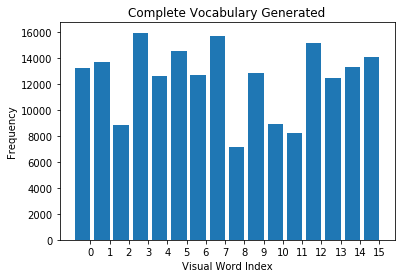

In [38]:
plotHist(clusters,megahist)

In [36]:
# Scaling 
scale = StandardScaler().fit(megahist)
megahist = scale.transform(megahist)

In [39]:
megahist.shape
Y = np.array(labels,'uint8')
Y.shape

(50000,)

In [461]:
def create_class_label(id,label_list):
    l = label_list.copy()
    for i in range(len(l)):
        if l[i] != id:
            l[i] = 0
        else :
            l[i] = 1
    return l

In [462]:
# Creating labels for training diff svms for all 10 classes
label0  = create_class_label(0,labels)
label1  = create_class_label(1,labels)
label2  = create_class_label(2,labels)
label3  = create_class_label(3,labels)
label4  = create_class_label(4,labels)
label5  = create_class_label(5,labels)
label6  = create_class_label(6,labels)
label7  = create_class_label(7,labels)
label8  = create_class_label(8,labels)
label9  = create_class_label(9,labels)

In [42]:
#labels
Y = np.array(labels,'int')

In [466]:
Y0 = np.array(label0,'int')
Y1 = np.array(label1,'int')
Y2 = np.array(label2,'int')
Y3 = np.array(label3,'int')
Y4 = np.array(label4,'int')
Y5 = np.array(label5,'int')
Y6 = np.array(label6,'int')
Y7 = np.array(label7,'int')
Y8 = np.array(label8,'int')
Y9 = np.array(label9,'int')

In [524]:
# Training SVC over Bag of Words
svc0 = SVC(C = 10,gamma = 0.01)
svc0.fit(megahist,Y0)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [518]:
# Training SVC over Bag of Words
svc1 = SVC(10)
svc1.fit(megahist,Y1)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [380]:
# Training SVC over Bag of Words
svc2 = SVC()
svc2.fit(megahist,Y2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [381]:
# Training SVC over Bag of Words
svc3 = SVC()
svc3.fit(megahist,Y3)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [382]:
# Training SVC over Bag of Words
svc4 = SVC()
svc4.fit(megahist,Y4)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [383]:
# Training SVC over Bag of Words
svc5 = SVC()
svc5.fit(megahist,Y5)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [384]:
# Training SVC over Bag of Words
svc6 = SVC()
svc6.fit(megahist,Y6)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [385]:
# Training SVC over Bag of Words
svc7 = SVC()
svc7.fit(megahist,Y7)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [386]:
# Training SVC over Bag of Words
svc8 = SVC()
svc8.fit(megahist,Y8)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [387]:
# Training SVC over Bag of Words
svc9 = SVC()
svc9.fit(megahist,Y9)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

param_grid = {'C':[0.1,100,500,1000],
              'gamma': [0,1,10,100,1000],
              'kernel': ['rbf','linear','poly']}
svm_model = GridSearchCV(estimator=svc0,param_grid=param_grid,cv=5)
svm_model.fit(megahist,Y0)
print(svm_model.best_params_)

In [41]:
from sklearn.multiclass import OneVsRestClassifier
m = OneVsRestClassifier(SVC())
m.fit(megahist, Y)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [42]:
m.classes_, m.multilabel_

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), False)

In [43]:
m.score(megahist, Y)

0.65

In [44]:
m.estimators_

[SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.0

In [45]:
scv = SVC().fit(megahist,Y)
scv

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
scv.score(megahist,Y)

0.30074

In [ ]:
print(classification_report(Y,))

 Training SVC over Bag of Words 
svc = SVC()
svc.fit(megahist,Y)

In [48]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(megahist, Y) 
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

# Testing

In [49]:
# Unloading test batch
test_images = []
test_labels = []
no_of_batches = 1
path = '/home/abhi/Image Datasets/cifar-10-batches-py/test_batch'
test_batch_images, test_batch_labels = unpickle_batch(path)
for each in test_batch_images:
    test_images.append(each)
for each in test_batch_labels:
    test_labels.append(each)

In [50]:
# Creating test_label array
test_labels = np.array(test_labels,'uint8')

In [57]:
# Creating labels for training diff svms for all 10 classes
test_label0  = create_class_label(0,test_labels)
test_label1  = create_class_label(1,test_labels)
test_label2  = create_class_label(2,test_labels)
test_label3  = create_class_label(3,test_labels)
test_label4  = create_class_label(4,test_labels)
test_label5  = create_class_label(5,test_labels)
test_label6  = create_class_label(6,test_labels)
test_label7  = create_class_label(7,test_labels)
test_label8  = create_class_label(8,test_labels)
test_label9  = create_class_label(9,test_labels)

NameError: name 'create_class_label' is not defined

In [471]:
# True labels for all classes
y0 = np.array(test_label0,'int')
y1 = np.array(test_label1,'int')
y2 = np.array(test_label2,'int')
y3 = np.array(test_label3,'int')
y4 = np.array(test_label4,'int')
y5 = np.array(test_label5,'int')
y6 = np.array(test_label6,'int')
y7 = np.array(test_label7,'int')
y8 = np.array(test_label8,'int')
y9 = np.array(test_label9,'int')

In [51]:
y = np.array(test_labels,'int')

In [72]:
# Classifying each image
prediction = []#[[-2],[-3],[-4],[-5],[-6],[-7],[-8],[-8],[-10],[-11]]
count = 0
model =  gnb # m #[svc0, svc1]#, svc2, svc3, svc4, svc5, svc6, svc7, svc8, svc9]
for each in test_images:
    #for i in range(len(model)):
    predict = recognise(each,model)#[i])
    prediction.append(predict)

In [53]:
# defining recognition pipeline
def recognise(img,model):
    img = gray(img)
    kp,desc = getFeatures(img)
    if desc is None:
        return 0
    else :
        word_strength = np.array([[0 for i in range(clusters)]])
        word_labels = kmeans.predict(des)
        for each in word_labels:
            word_strength[0][each]+=1
        word_strength = scale.transform(word_strength)
        prediction = model.predict(word_strength)
        return prediction   

In [73]:
len(prediction)#[0:40]

10000

In [74]:
test_preds_gnb = np.array(prediction,'int')
#test_p[0] # a prediction by one vs all
test_preds_gnb.shape

(10000,)

In [77]:
# Result on batch 1 with 10 clusters
print(classification_report(y,test_pp))
#prediction

              precision    recall  f1-score   support

           0       0.50      0.01      0.02      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.10      1.00      0.18      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.06      0.10      0.02     10000
weighted avg       0.06      0.10      0.02     10000



In [294]:
# Result on batch 1 with 256 clusters
print(classification_report(y,test_labels))

              precision    recall  f1-score   support

           0       0.01      0.50      0.02        24
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.10      0.18      9976
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     10000
   macro avg       0.10      0.06      0.02     10000
weighted avg       1.00      0.10      0.18     10000



In [371]:
# Prediction of class0 in batch 1
print(classification_report(y0,y))

              precision    recall  f1-score   support

          -1       0.90      1.00      0.95      9000
           0       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



In [528]:
pred0 = np.array(prediction[0][1:],'int')
pred1 = np.array(prediction[1][1:],'int')
# pred2 = np.array(prediction[2][1:],'int')
# pred3 = np.array(prediction[3][1:],'int')
# pred4 = np.array(prediction[4][1:],'int')
# pred5 = np.array(prediction[5][1:],'int')
# pred6 = np.array(prediction[6][1:],'int')
# pred7 = np.array(prediction[7][1:],'int')
# pred8 = np.array(prediction[8][1:],'int')
# pred9 = np.array(prediction[9][1:],'int')

In [514]:
pred0

array([0, 0, 0, ..., 0, 0, 0])

In [484]:
# Prediction of class0 in batch 1 when predicted on just svc0
print(classification_report(y0,pred0))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



/home/abhi/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [487]:
# confusion mat for svc0 predictions
print(confusion_matrix(y0,pred0))

[[9000    0]
 [1000    0]]


In [496]:
# Prediction of class0 in batch 1 when predicted on just svc0 and svc1 with 256 words(clusters)
print(classification_report(y0,pred0))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



In [497]:
# Prediction of class0 in batch 1 when predicted on just svc0 256 words(clusters)
print(classification_report(y1,pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



In [515]:
# Prediction of class0 in batch 1 when predicted on just svc0 256 words(clusters)
print(classification_report(y1,pred1))

# Prediction of class0 in batch 1 when predicted on just svc0 and svc1 with 16 words(clusters)
print(classification_report(y0,pred0))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



/home/abhi/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [516]:
# Prediction of class0 in batch 1 when predicted on just svc0 16 words(clusters)
print(classification_report(y1,pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



In [525]:
# Prediction of class0 in batch 1 when predicted on just svc0 and svc1 with 16 words(clusters) C =100 
print(classification_report(y0,pred0))
# Prediction of class0 in batch 1 when predicted on just svc0 16 words(clusters)
print(classification_report(y1,pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



/home/abhi/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [529]:
# Prediction of class0 in batch 1 when predicted on just svc0 and svc1 with 16 words(clusters) C =10 
print(classification_report(y0,pred0))
# Prediction of class0 in batch 1 when predicted on just svc0 16 words(clusters) C=10
print(classification_report(y1,pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.00      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



/home/abhi/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# Prediction when predicted on just scv with 16 words  
print(classification_report(y,test_preds_svc))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      1.00      0.18      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.06      0.10      0.02     10000
weighted avg       0.06      0.10      0.02     10000



In [71]:
# Prediction with 16 words using onevsRest model using SVC estimator
print(classification_report(y,test_preds_m))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.10      1.00      0.18      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.06      0.10      0.02     10000
weighted avg       0.06      0.10      0.02     10000



/home/abhi/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# Prediction of NaiveBase Model with 16 words(clusters) 
print(classification_report(y,test_preds_gnb))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      1.00      0.18      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.06      0.10      0.02     10000
weighted avg       0.06      0.10      0.02     10000



/home/abhi/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Testing some error:

#### Error : None type obj has no shape
Status : Solved
First Occurence :bagofWord method
Method: 
1. Checked if some images are no producing any kp : True so apended a zero vectr of (1,128) shape

#### Error : Total descriptors are more than what should be generated
Status : Solved
first occurence : first caught on bagofWords method since it gave index error at kmenas_ret['']
Method: 
1. Checked diff indices using below loop found out indices were going way out of bounds
2. Checked the total no of desc that could result of whole dataset (were less than what actually  should be)
3. Checked the dummy desc and found wrong shape was given (128) instead of (1,128) which resulted in extra features.

old_c = 0
for i in range(n_images):
        l = len(desc_list[i])
        for j in range(l):
            print(i,"  ",l,"  ",j,"  ",old_c,"  ",old_c+j)
        old_c += l